In [1]:
# import recuired packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [2]:
t_list=np.linspace(0.0, 100, 1000)

In [3]:
# define one-predator three-prey species model
#Predator recognises Prey1 and Prey 2 as the same prey
def functree(v,t,b1,b2,b3,r1,r2,r3,s,m1):
    dc1dt = v[0]*(v[4]*(b1*v[1]+b2*v[2]-m1)+v[5]*(b3*v[3]-m1))
    dr1dt = v[1]*(r1-s*v[1]-v[4]*v[0])
    dr2dt = v[2]*(r2-s*v[2]-v[4]*v[0])
    dr3dt = v[3]*(r3-s*v[3]-v[5]*v[0])
    da1dt = v[4]*(b1*(1-v[4])*v[1]+b2*(1-v[4])*v[2]-b3*v[5]*v[3])
    da2dt = v[5]*(b3*(1-v[5])*v[3]-v[4]*(b1*v[1]+b2*v[2]))
    return [dc1dt,dr1dt,dr2dt,dr3dt,da1dt,da2dt]

In [4]:
v=[1,1,1,1,0.7,0.3] # initial conditon
#parameter of this simulation 
b1=1
b2=2
b3=4
r1=4
r2=2
r3=1.5
s =1
m1=2

In [5]:
#solve this model using package odeint
var_list=odeint(functree,v,t_list,args=(b1,b2,b3,r1,r2,r3,s,m1))

(0, 5.78915304018511)

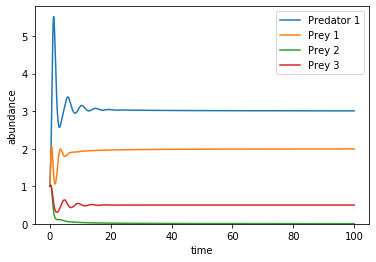

In [6]:
#plot one-predator three-prey model simulation
plt.plot(t_list,var_list[:,0],label="Predator 1")
plt.plot(t_list,var_list[:,1],label="Prey 1")
plt.plot(t_list,var_list[:,2],label="Prey 2")
plt.plot(t_list,var_list[:,3],label="Prey 3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [7]:
init = [1,1,1,1,1,0.5,0.5,0.5,0.5] # initial conditon(Case2,Case3)
init2 = [1,1,1,1,1,0.5,0.5,0.4,0.3,0.3] #inital condition(Case4)
# the parameters of this simulation( all cases)
b1 = 1
b2 = 2
b3 = 4
r1 = 4
r2 = 2
r3 = 1.5
m1 = 2
m2 = 1.5
s = 1.0

In [8]:
#define two-predator three-prey model(case2)
def functree(v,t,b1,b2,b3,r1,r2,r3,s,m1,m2):
    dc1dt = v[0]*(v[5]*(b1*v[2]+b2*v[3])+v[6]*b3*v[4]-m1)
    dc2dt = v[1]*(v[7]*b1*v[2]+v[8]*(b2*v[3]+b3*v[4])-m2)
    dr1dt = v[2]*(r1-s*v[2]-v[5]*v[0]-v[7]*v[1])
    dr2dt = v[3]*(r2-s*v[3]-v[5]*v[0]-v[8]*v[1])
    dr3dt = v[4]*(r3-s*v[4]-v[6]*v[0]-v[8]*v[1])
    da1dt = v[5]*(b1*(1-v[5])*v[2]+b2*(1-v[5])*v[3]-b3*v[4]*v[6])
    da2dt = v[6]*(b3*(1-v[6])*v[4]-v[5]*(b1*v[2]+b2*v[3]))
    da3dt = v[7]*(b1*(1-v[7])*v[2]-v[8]*(b2*v[3]+b3*v[4]))
    da4dt = v[8]*((1-v[8])*(b2*v[3]+b3*v[4])-b1*v[2]*v[7])
    return [dc1dt,dc2dt,dr1dt,dr2dt,dr3dt,da1dt,da2dt,da3dt,da4dt]

In [9]:
#caluculate this model(case2)
var_list = odeint(functree, init, t_list, args=(b1,b2,b3,r1,r2,r3,s,m1,m2))

(0, 4.285309336789647)

/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


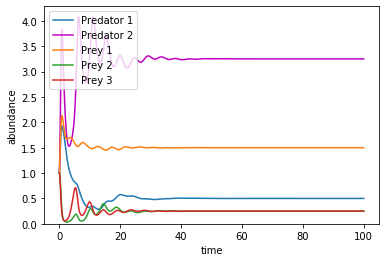

In [10]:
#plot this model(case2)
plt.plot(t_list,var_list[:,0],label="Predator 1")
plt.plot(t_list,var_list[:,1],label="Predator 2",color="M")
plt.plot(t_list,var_list[:,2],label="Prey 1")
plt.plot(t_list,var_list[:,3],label="Prey 2")
plt.plot(t_list,var_list[:,4],label="Prey 3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [11]:
# define two-predator three-prey model (Case3)
def functree(v,t,b1,b2,b3,r1,r2,r3,s,m1,m2):
    dc1dt = v[0]*(v[5]*(b1*v[2]+b2*v[3])+v[6]*b3*v[4]-m1)
    dc2dt = v[1]*(v[7]*(b1*v[2]+b3*v[4])+v[8]*b2*v[3]-m2)
    dr1dt = v[2]*(r1-s*v[2]-v[5]*v[0]-v[7]*v[1])
    dr2dt = v[3]*(r2-s*v[3]-v[5]*v[0]-v[8]*v[1])
    dr3dt = v[4]*(r3-s*v[4]-v[6]*v[0]-v[7]*v[1])
    da1dt = v[5]*(b1*(1-v[5])*v[2]+b2*(1-v[5])*v[3]-b3*v[4]*v[6])
    da2dt = v[6]*(b3*(1-v[6])*v[4]-v[5]*(b1*v[2]+b2*v[3]))
    da3dt = v[7]*(b1*v[2]+b3*v[4]-v[7]*(b1*v[2]+b3*v[4])-v[8]*b2*v[3])
    da4dt = v[8]*(b2*v[3]-v[7]*(b1*v[2]+b3*v[4])-v[8]*b2*v[3])
    return [dc1dt,dc2dt,dr1dt,dr2dt,dr3dt,da1dt,da2dt,da3dt,da4dt]

In [12]:
#caluculate model (Case 3)
var_list = odeint(functree, init, t_list, args=(b1,b2,b3,r1,r2,r3,s,m1,m2))

(0, 4.210626220198407)

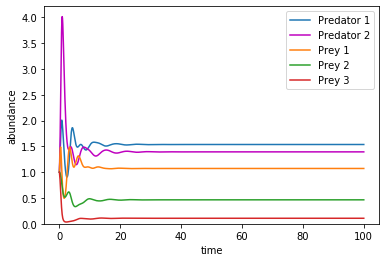

In [13]:
#plot model(Case3)
plt.plot(t_list,var_list[:,0],label="Predator 1")
plt.plot(t_list,var_list[:,1],label="Predator 2",color="M")
plt.plot(t_list,var_list[:,2],label="Prey 1")
plt.plot(t_list,var_list[:,3],label="Prey 2")
plt.plot(t_list,var_list[:,4],label="Prey 3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)

In [14]:
# define the model of predator-prey(case4)
def functree(v,t,b1,b2,b3,r1,r2,r3,s,m1,m2):
    dc1dt = v[0]*(v[5]*(b1*v[2]+b2*v[3])+v[6]*b3*v[4]-m1)
    dc2dt = v[1]*(v[7]*b1*v[2]+v[8]*b2*v[3]+v[9]*b3*v[4]-m2)
    dr1dt = v[2]*(r1-s*v[2]-v[5]*v[0]-v[7]*v[1])
    dr2dt = v[3]*(r2-s*v[3]-v[5]*v[0]-v[8]*v[1])
    dr3dt = v[4]*(r3-s*v[4]-v[6]*v[0]-v[9]*v[1])
    da1dt = v[5]*(b1*(1-v[5])*v[2]+b2*(1-v[5])*v[3]-b3*v[4]*v[6])
    da2dt = v[6]*(b3*(1-v[6])*v[4]-v[5]*(b1*v[2]+b2*v[3]))
    da3dt = v[7]*(b1*v[2]-b1*v[7]*v[2]-v[8]*b2*v[3]-v[9]*b3*v[4])
    da4dt = v[8]*(b2*v[3]-b1*v[7]*v[2]-v[8]*b2*v[3]-v[9]*b3*v[4])
    da5dt = v[9]*(b3*v[4]-b1*v[7]*v[2]-v[8]*b2*v[3]-v[9]*b3*v[4])
    return [dc1dt,dc2dt,dr1dt,dr2dt,dr3dt,da1dt,da2dt,da3dt,da4dt,da5dt]

In [15]:
#Caluculate model(case4)
var_list = odeint(functree, init2, t_list, args=(b1,b2,b3,r1,r2,r3,s,m1,m2))

(0, 3.9603565926127096)

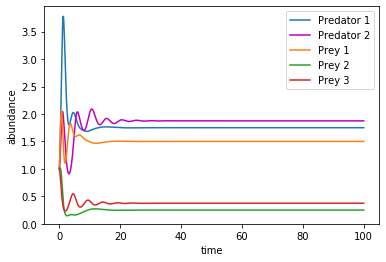

In [16]:
#plot model(case4)
plt.plot(t_list,var_list[:,0],label="Predator 1")
plt.plot(t_list,var_list[:,1],label="Predator 2",color="M")
plt.plot(t_list,var_list[:,2],label="Prey 1")
plt.plot(t_list,var_list[:,3],label="Prey 2")
plt.plot(t_list,var_list[:,4],label="Prey 3")
plt.xlabel('time')
plt.ylabel('abundance')
plt.legend()
plt.ylim(0,)